<a href="https://colab.research.google.com/github/Dhavalkumar510/Final_Year_Project_UH/blob/main/Final_Year_Project_UH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary Libraray Functions

In [23]:
pip install yfinance

In [45]:
import yfinance as yf
import itertools
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense, Dropout
from keras.utils import plot_model
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import plot_model
import matplotlib.image as mpimg
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math


In [112]:
# Define the stock ticker (Lloyds Banking Group PLC)
ticker = 'LLOY.L'

# Get today's date in dd-mm-yyyy format
today = datetime.today().strftime('%d-%m-%Y')

# Fetch historical data until today
yf_data = yf.download(ticker, start='2010-01-01', end=datetime.today().strftime('%Y-%m-%d'))

# Convert the index to dd-mm-yyyy format
yf_data.index = yf_data.index.strftime('%d-%m-%Y')

data = yf_data

# Display the DataFrame

print(pd.DataFrame(data.head(15)))

print(pd.DataFrame(data.tail(15)))

[*********************100%***********************]  1 of 1 completed

Price       Adj Close      Close       High        Low       Open     Volume
Ticker         LLOY.L     LLOY.L     LLOY.L     LLOY.L     LLOY.L     LLOY.L
Date                                                                        
04-01-2010  36.779499  52.259998  52.259998  51.099998  51.400002  167623403
05-01-2010  38.025188  54.029999  54.759998  52.200001  52.500000  233026957
06-01-2010  38.419312  54.590000  55.230000  53.169998  55.000000  142079248
07-01-2010  40.066143  56.930000  57.070000  54.000000  54.860001  216171360
08-01-2010  40.045036  56.900002  57.520000  56.160000  56.990002  178033888
11-01-2010  39.503124  56.130001  57.950001  55.630001  57.799999  169834032
12-01-2010  39.390518  55.970001  56.290001  55.080002  55.590000  189050155
13-01-2010  39.411633  56.000000  56.200001  55.160000  55.639999  117598072
14-01-2010  40.467300  57.500000  58.000000  56.580002  57.000000  225878876
15-01-2010  39.960579  56.779999  58.509998  56.599998  57.709999  241352597

In [113]:
print("Missing values before handling:")
print(data.isnull().sum())

Missing values before handling:
Price      Ticker
Adj Close  LLOY.L    0
Close      LLOY.L    0
High       LLOY.L    0
Low        LLOY.L    0
Open       LLOY.L    0
Volume     LLOY.L    0
dtype: int64


In [114]:
# Save data to a CSV file
data.to_csv("Lloyds_Bank_Data.csv")

# Opening Price

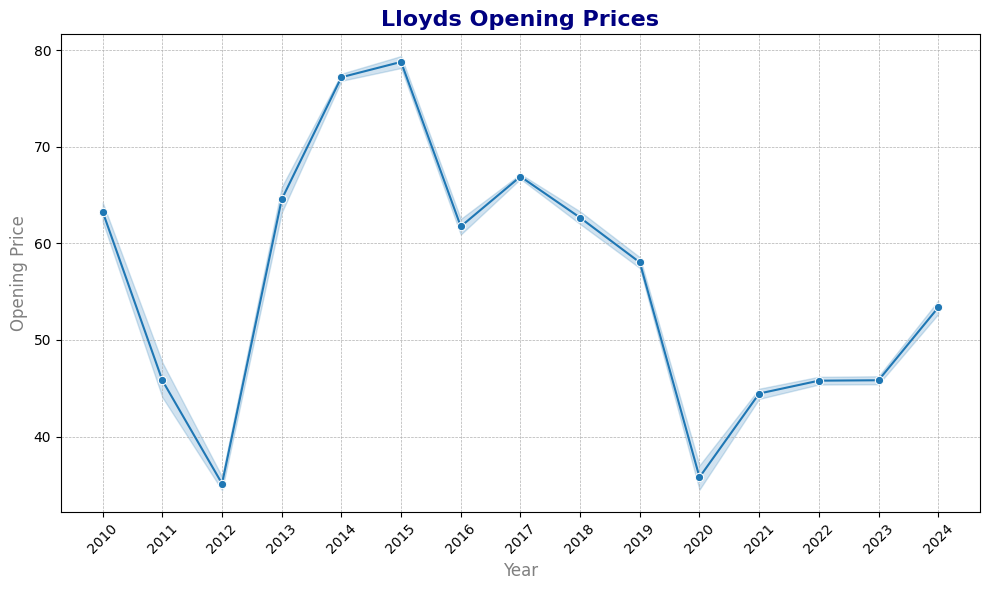

In [57]:
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')
years = data.index.year

# Plot Opening Prices
plt.figure(figsize=(10, 6))
sns.lineplot(x=years, y=data['Open'].values.ravel(), color='#1f77b4', marker='o')
plt.title('Lloyds Opening Prices', fontsize=16, color='navy', weight='bold')
plt.xlabel('Year', fontsize=12, color='gray')
plt.ylabel('Opening Price', fontsize=12, color='gray')

# Set x-ticks to show unique years
plt.xticks(ticks=range(years.min(), years.max() + 1), rotation=45)

plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Closing Price

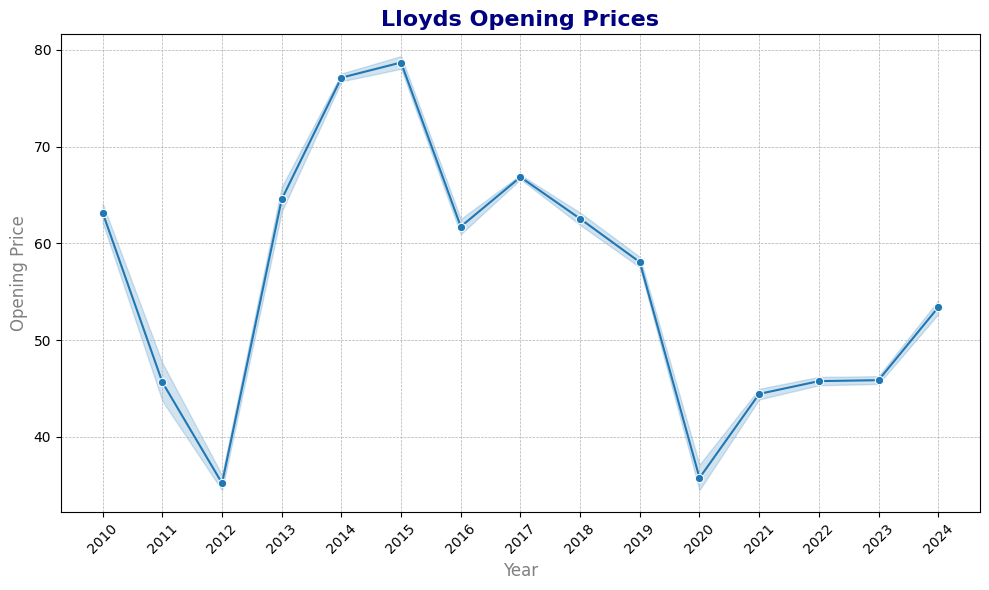

In [115]:
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')
years = data.index.year

# Plot Opening Prices
plt.figure(figsize=(10, 6))
sns.lineplot(x=years, y=data['Close'].values.ravel(), color='#1f77b4', marker='o')
plt.title('Lloyds Opening Prices', fontsize=16, color='navy', weight='bold')
plt.xlabel('Year', fontsize=12, color='gray')
plt.ylabel('Opening Price', fontsize=12, color='gray')

# Set x-ticks to show unique years
plt.xticks(ticks=range(years.min(), years.max() + 1), rotation=45)
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

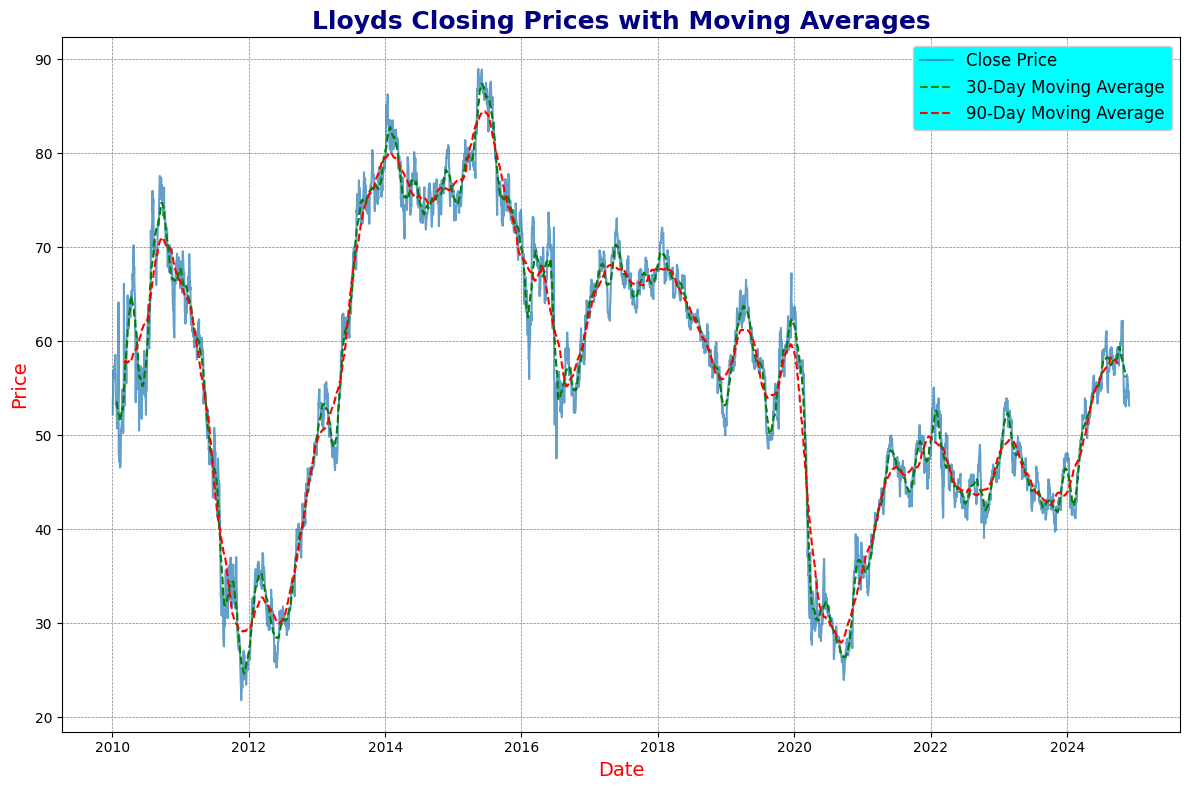

In [59]:
import matplotlib.pyplot as plt

# Ensure the index is in datetime format
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')

# Calculate Moving Averages
data['MA_30'] = data['Close'].rolling(window=30, center=True).mean()  # 30-day moving average
data['MA_90'] = data['Close'].rolling(window=90, center=True).mean()  # 90-day moving average

# Plot Close Prices with Moving Averages
plt.figure(figsize=(12, 8))
# Plot the data
plt.plot(data.index, data['Close'], label='Close Price', color='#1f77b4', alpha=0.7, linewidth=1.5)  # Blue for close price
plt.plot(data.index, data['MA_30'], label='30-Day Moving Average', color='green', linestyle='--', linewidth=1.5)  # Orange for MA_30
plt.plot(data.index, data['MA_90'], label='90-Day Moving Average', color='red', linestyle='--', linewidth=1.5)  # Green for MA_90

# Add labels and title
plt.title('Lloyds Closing Prices with Moving Averages', fontsize=18, color='navy', weight='bold')
plt.xlabel('Date', fontsize=14, color='Red')
plt.ylabel('Price', fontsize=14, color='Red')

# Add a legend with a colored box
legend = plt.legend(frameon=True, loc='upper right', fontsize=12)
frame = legend.get_frame()
frame.set_facecolor('cyan')
frame.set_alpha(1)
# Add grid
plt.grid(visible=True, linestyle='--', linewidth=0.5, color='gray')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


# LSTM Model

In [88]:
# Scale the Close Prices
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Prepare data for LSTM
def create_lstm_dataset(dataset, time_step=30):
    X, y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:i + time_step])
        y.append(dataset[i + time_step])
    return np.array(X), np.array(y)

# Define time step for sequence
time_step = 45
X, y = create_lstm_dataset(scaled_data, time_step)

# Split data into train and test sets
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Build the LSTM model
model = Sequential([
    Bidirectional(LSTM(100, return_sequences=True, input_shape=(time_step, 1))),
    Dropout(0.3),
    BatchNormalization(),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu', kernel_regularizer='l2'),
    Dense(1)
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

model.build(input_shape=(None, time_step, 1))

# Visualize the model architecture
plot_model(model, show_shapes=True, show_layer_names=True, to_file='lstm_architecture.png')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - loss: 0.3434
Epoch 2/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - loss: 0.1632
Epoch 3/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - loss: 0.0802
Epoch 4/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - loss: 0.0396
Epoch 5/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 17s 155ms/step - loss: 0.0204
Epoch 6/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 17s 117ms/step - loss: 0.0130
Epoch 7/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 17s 84ms/step - loss: 0.0090
Epoch 8/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 105ms/step - loss: 0.0070
Epoch 9/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - loss: 0.0059
Epoch 10/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - loss: 0.0051
Epoch 11/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - loss: 0.0039
Epoch 12/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 11s 107ms/step - loss: 0.0032
Epoch 13/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - loss: 0.0029
Epoch 14/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - loss: 0.0026
Epoch 15/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - l

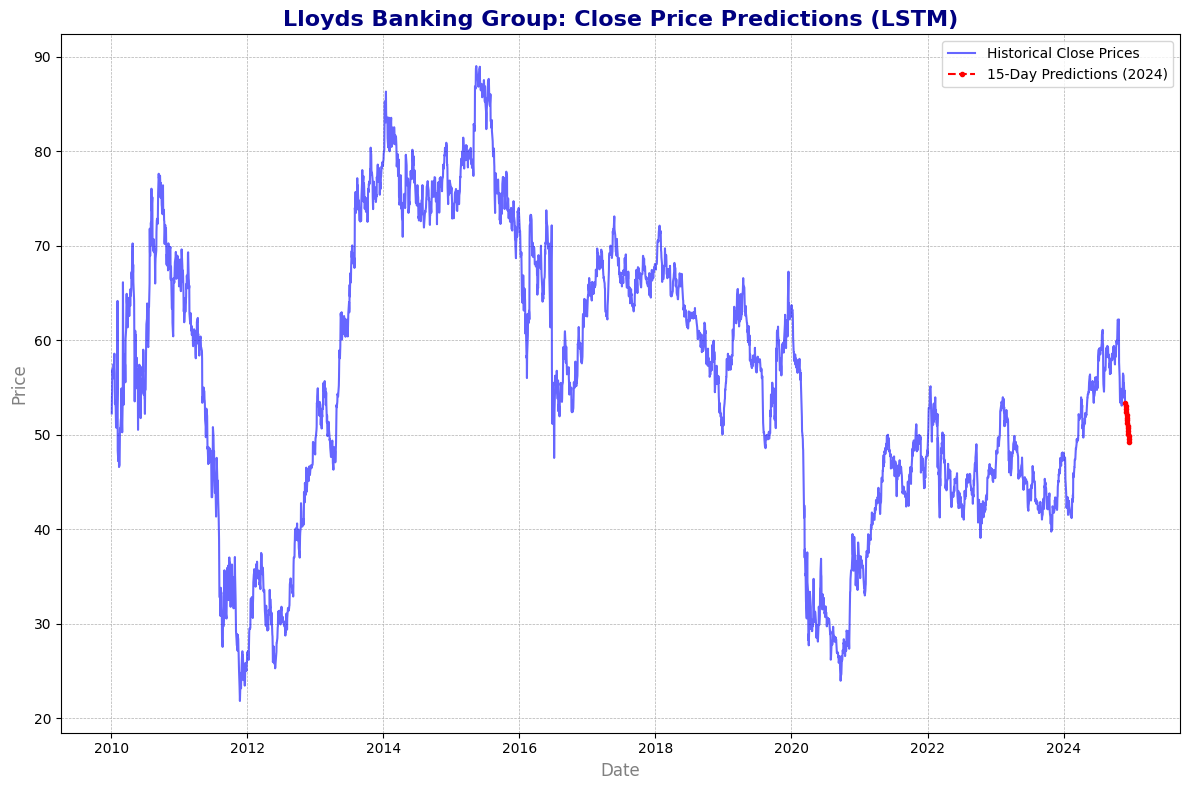

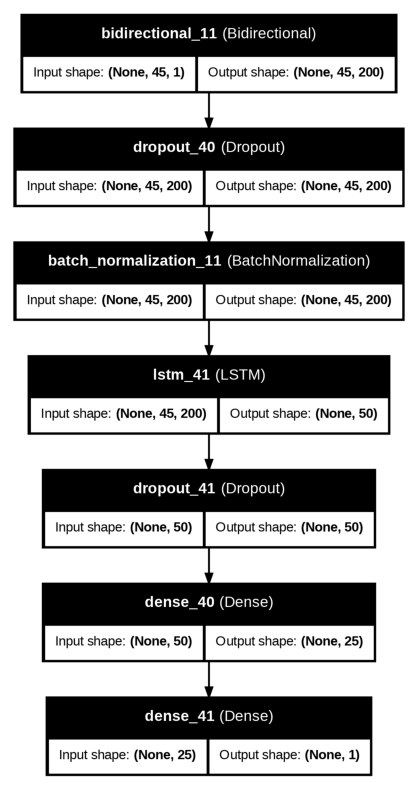

         Date  Predicted Close
0  2024-11-28        53.336090
1  2024-11-29        52.999840
2  2024-12-02        52.688816
3  2024-12-03        52.388435
4  2024-12-04        52.093712
5  2024-12-05        51.802883
6  2024-12-06        51.515285
7  2024-12-09        51.230541
8  2024-12-10        50.948338
9  2024-12-11        50.668320
10 2024-12-12        50.390041
11 2024-12-13        50.113041
12 2024-12-16        49.836788
13 2024-12-17        49.560730
14 2024-12-18        49.284248


In [89]:
# Predict future values for the next 15 business days using the most recent sequence
last_sequence = scaled_data[-time_step:]
future_predictions = []

for _ in range(15):
    prediction = model.predict(last_sequence.reshape(1, time_step, 1), verbose=0)
    future_predictions.append(prediction[0, 0])
    last_sequence = np.append(last_sequence[1:], prediction, axis=0)

# Inverse scale the predictions back to the original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Generate future dates starting from the last available date
future_dates = pd.date_range(start=data.index[-1], periods=16, freq='B')[1:]  # Exclude the last date

# Create a DataFrame for future predictions
future_df = pd.DataFrame({'Date': future_dates, 'Predicted Close': future_predictions.ravel()})

# Plot the predictions
plt.figure(figsize=(12, 8))
plt.plot(data.index, data['Close'], label='Historical Close Prices', color='blue', alpha=0.6)
plt.plot(future_df['Date'], future_df['Predicted Close'], label='15-Day Predictions (2024)', color='red', linestyle='--', marker='.')
plt.title('Lloyds Banking Group: Close Price Predictions (LSTM)', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Display the LSTM model architecture image
img = mpimg.imread('lstm_architecture.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

# Print predicted values
print(future_df)


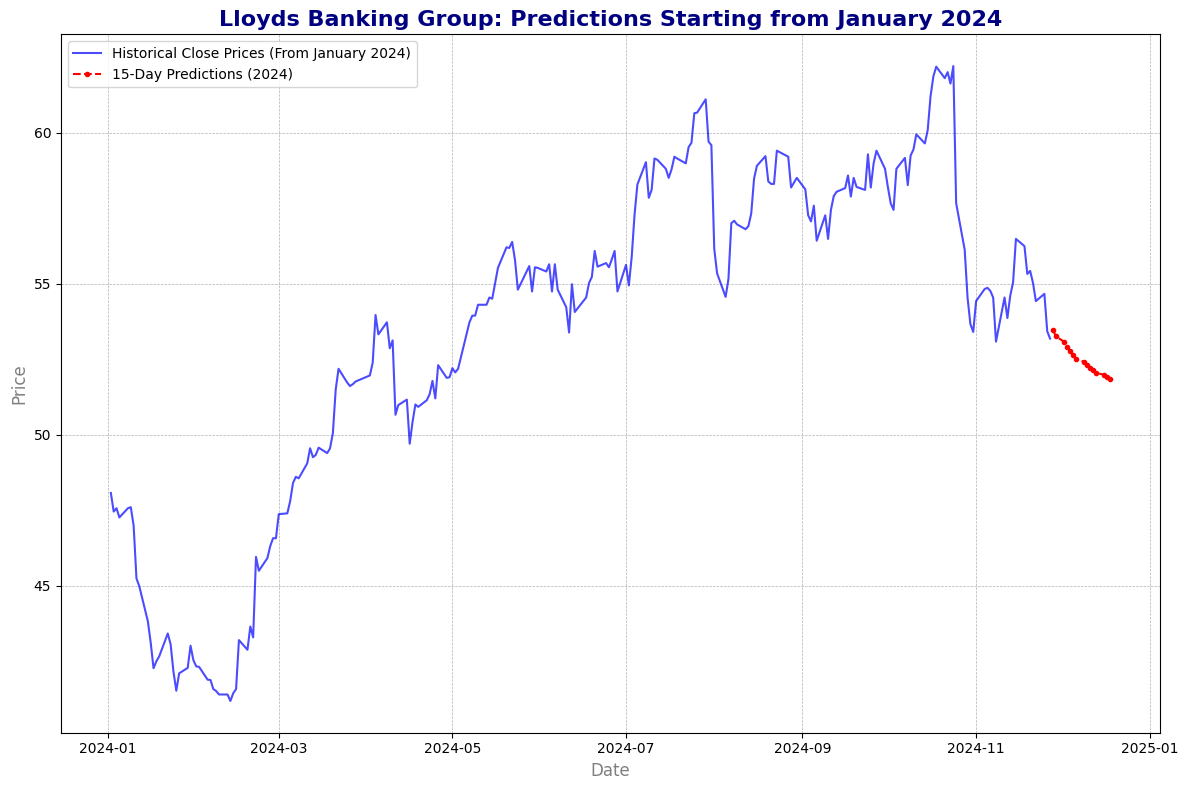

In [86]:
# Convert the index to datetime format (if not already done)
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')

# Filter data starting from January 1, 2024
filtered_data = data[data.index >= '2024-01-01']

# Plot the subset data with predictions
plt.figure(figsize=(12, 8))
plt.plot(filtered_data.index, filtered_data['Close'], label='Historical Close Prices (From January 2024)', color='blue', alpha=0.7)
plt.plot(future_df['Date'], future_df['Predicted Close'], label='15-Day Predictions (2024)', color='red', linestyle='--', marker='.')
plt.title('Lloyds Banking Group: Predictions Starting from January 2024', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
Test Evaluation Metrics:
Mean Squared Error (MSE): 1.5938
Root Mean Squared Error (RMSE): 1.2625
Mean Absolute Error (MAE): 1.0000
R-squared (R²): 0.9462


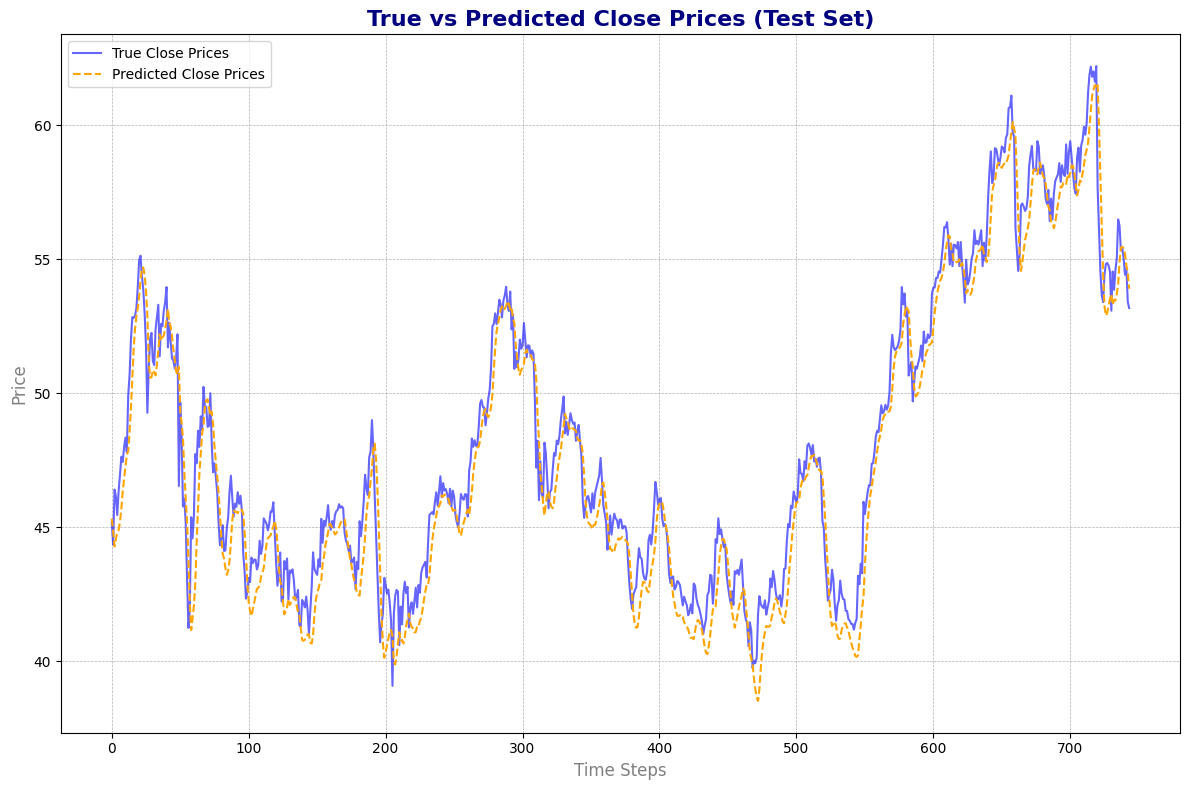

In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and true values
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_original, y_pred_original)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)

# Print the evaluation metrics
print("Test Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Plot true vs predicted prices for the test set
plt.figure(figsize=(12, 8))
plt.plot(y_test_original, label='True Close Prices', color='blue', alpha=0.6)
plt.plot(y_pred_original, label='Predicted Close Prices', color='orange', linestyle='--')
plt.title('True vs Predicted Close Prices (Test Set)', fontsize=16, color='navy', weight='bold')
plt.xlabel('Time Steps', fontsize=12, color='gray')
plt.ylabel('Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


#ARIMA Model

In [12]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.8 MB/s eta 0:00:00


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11711.600, Time=5.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11725.047, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11723.688, Time=0.87 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11723.192, Time=2.86 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11723.047, Time=0.34 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11710.863, Time=2.69 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=11708.972, Time=1.04 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=11710.932, Time=2.34 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11713.692, Time=6.10 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=11712.041, Time=8.13 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=11706.973, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=11721.192, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=11708.863, Time=0.42 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=11708.932, Time=0.46 sec
 ARIMA(1,1,1)(0,0,0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Model Fit Diagnostics:
                               SARIMAX Results                                
Dep. Variable:                 LLOY.L   No. Observations:                 3764
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -5850.486
Date:                Thu, 28 Nov 2024   AIC                          11706.973
Time:                        12:36:53   BIC                          11725.671
Sample:                             0   HQIC                         11713.621
                               - 3764                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0325      0.006     -5.687      0.000      -0.044      -0.021
ma.L2         -0.0672      0.013     -5.156      0.000      -0.093      -0.042
sigma2         1.3120      0

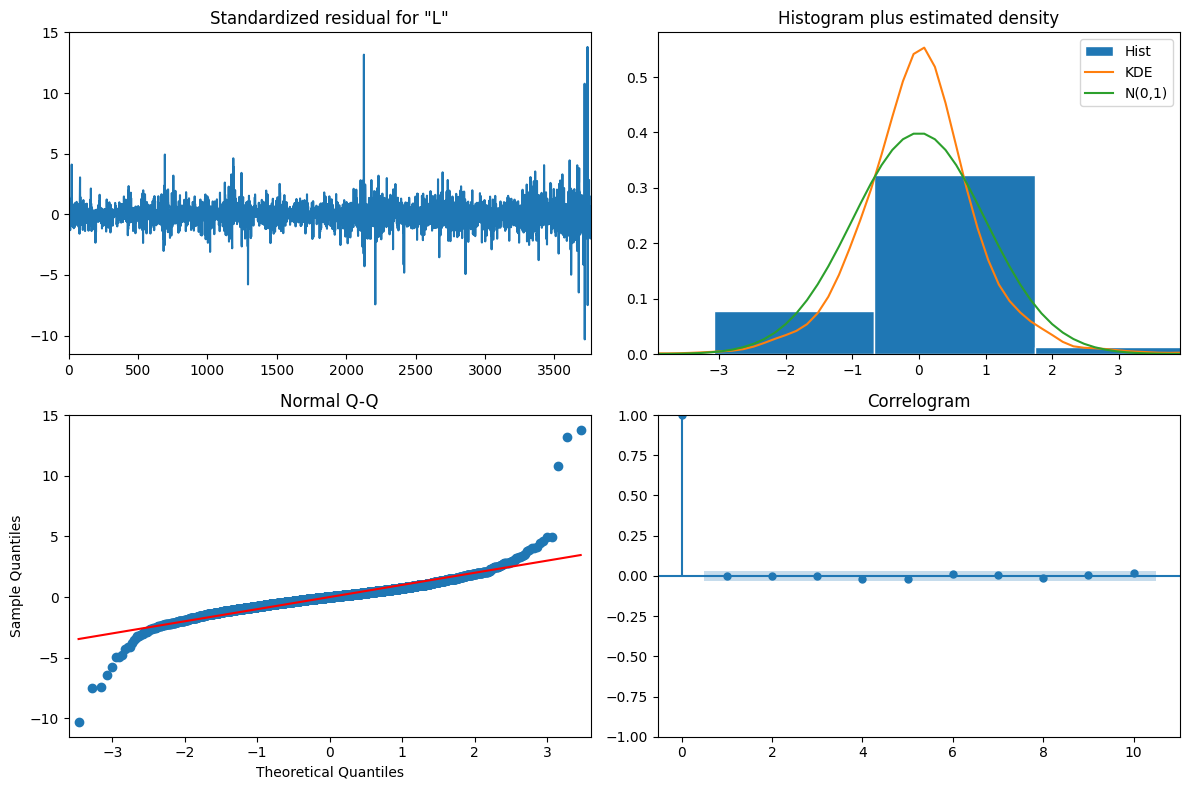

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


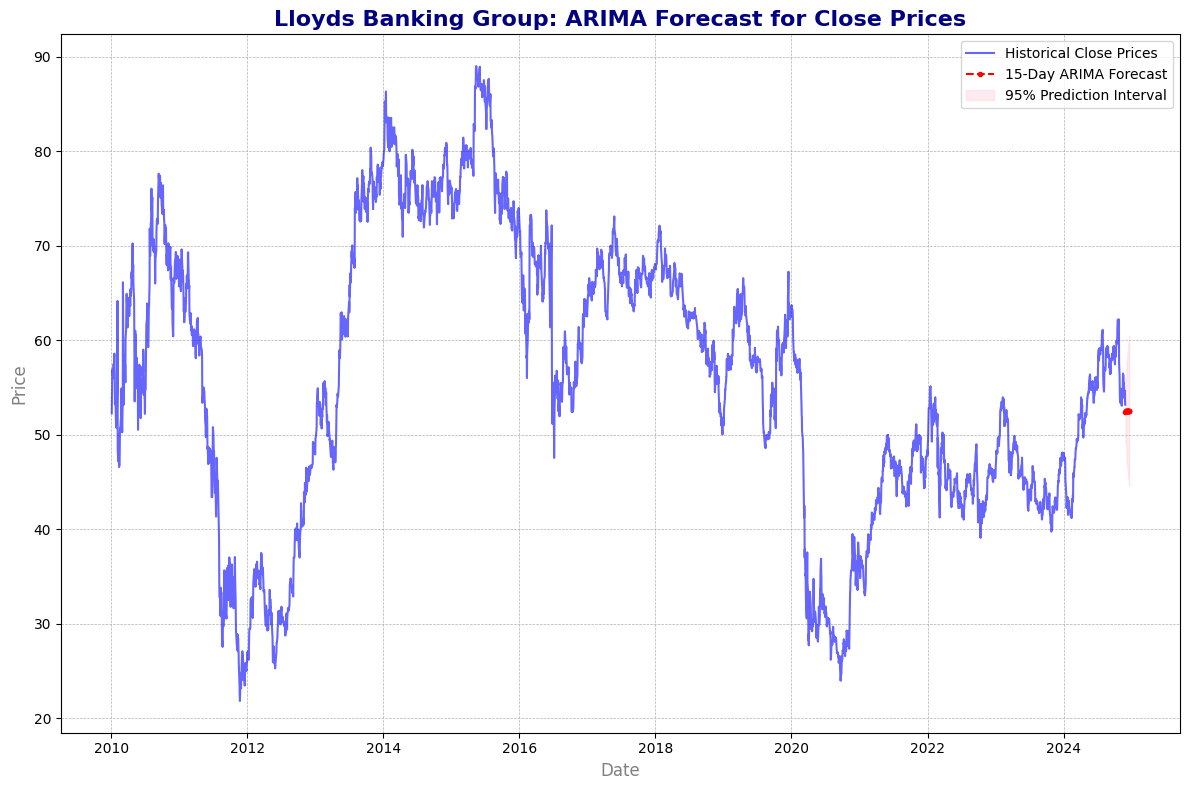

Forecasted Close Prices for the Next 15 Days of 2024:
           Date  Forecasted Close  Lower Bound  Upper Bound
3764 2024-11-28         52.365557    50.120526    54.610588
3765 2024-11-29         52.496213    49.372434    55.619992
3766 2024-12-02         52.496213    48.775573    56.216853
3767 2024-12-03         52.496213    48.262027    56.730399
3768 2024-12-04         52.496213    47.804358    57.188068
3769 2024-12-05         52.496213    47.387527    57.604899
3770 2024-12-06         52.496213    47.002231    57.990195
3771 2024-12-09         52.496213    46.642239    58.350187
3772 2024-12-10         52.496213    46.303138    58.689288
3773 2024-12-11         52.496213    45.981664    59.010762
3774 2024-12-12         52.496213    45.675325    59.317101
3775 2024-12-13         52.496213    45.382165    59.610261
3776 2024-12-16         52.496213    45.100616    59.891810
3777 2024-12-17         52.496213    44.829400    60.163026
3778 2024-12-18         52.496213    44.567456

In [13]:
import pmdarima as pm
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Extract 'Close' prices as a time series
close_prices = data['Close']

# Find the best ARIMA model using pmdarima's AutoARIMA
model = pm.auto_arima(
    close_prices,
    seasonal=False,           # No seasonality
    stepwise=True,            # Stepwise search for faster results
    suppress_warnings=True,   # Suppress warnings
    error_action='ignore',    # Ignore non-fatal errors
    trace=True                # Print the model selection process
)

# Print the best ARIMA model summary
print("Best ARIMA Model Summary:")
print(model.summary())

# Fit the model on the data
model_fit = SARIMAX(close_prices, order=model.order).fit(disp=False)

# Print model fit diagnostics
print("\nModel Fit Diagnostics:")
print(model_fit.summary())

# Plot diagnostics for residuals
model_fit.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Forecast for the next 15 business days
forecast = model_fit.get_forecast(steps=15)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Dynamically get the first date of the dataset
start_date = pd.to_datetime(data.index[0])  # Convert index to datetime
future_dates = pd.date_range(start=start_date, periods=16, freq='B')[1:]  # Generate 15 future dates

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecasted Close': forecast_values,
    'Lower Bound': forecast_conf_int.iloc[:, 0],
    'Upper Bound': forecast_conf_int.iloc[:, 1]
})

# Plot historical data with the forecast
plt.figure(figsize=(12, 8))
plt.plot(data.index, data['Close'], label='Historical Close Prices', color='blue', alpha=0.6)
plt.plot(forecast_df['Date'], forecast_df['Forecasted Close'], label='15-Day ARIMA Forecast', color='red', linestyle='--', marker='.')
plt.fill_between(forecast_df['Date'], forecast_df['Lower Bound'], forecast_df['Upper Bound'], color='pink', alpha=0.3, label='95% Prediction Interval')
plt.title('Lloyds Banking Group: ARIMA Forecast for Close Prices', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Display the forecasted values
print("Forecasted Close Prices for the Next 15 Days of 2024:")
print(forecast_df)


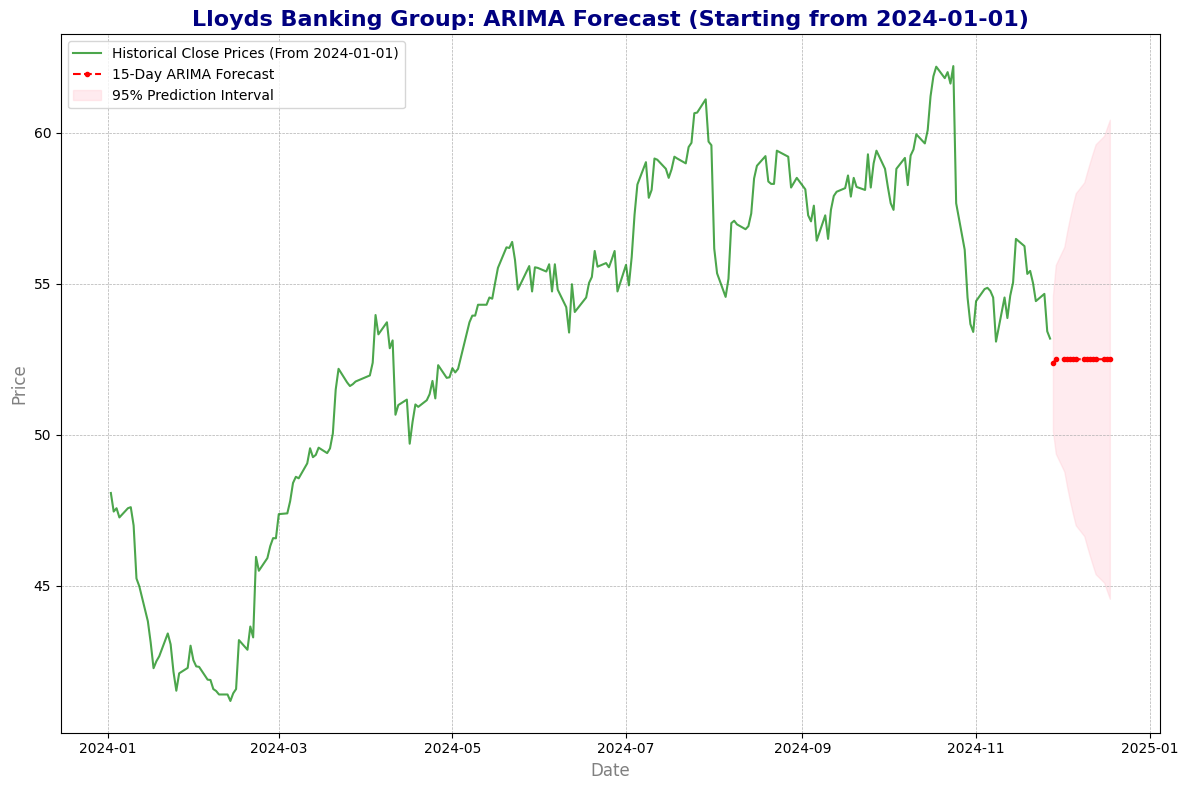

Forecasted Close Prices for the Next 15 Days of 2024:
           Date  Forecasted Close  Lower Bound  Upper Bound
3764 2024-11-28         52.365557    50.120526    54.610588
3765 2024-11-29         52.496213    49.372434    55.619992
3766 2024-12-02         52.496213    48.775573    56.216853
3767 2024-12-03         52.496213    48.262027    56.730399
3768 2024-12-04         52.496213    47.804358    57.188068
3769 2024-12-05         52.496213    47.387527    57.604899
3770 2024-12-06         52.496213    47.002231    57.990195
3771 2024-12-09         52.496213    46.642239    58.350187
3772 2024-12-10         52.496213    46.303138    58.689288
3773 2024-12-11         52.496213    45.981664    59.010762
3774 2024-12-12         52.496213    45.675325    59.317101
3775 2024-12-13         52.496213    45.382165    59.610261
3776 2024-12-16         52.496213    45.100616    59.891810
3777 2024-12-17         52.496213    44.829400    60.163026
3778 2024-12-18         52.496213    44.567456

In [14]:
# Filter historical data from 2024-01-01 onward
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')  # Ensure the index is datetime
filtered_data = data[data.index >= '2024-01-01']

# Plot data from 2024-01-01 with forecast
plt.figure(figsize=(12, 8))
plt.plot(filtered_data.index, filtered_data['Close'], label='Historical Close Prices (From 2024-01-01)', color='green', alpha=0.7)
plt.plot(forecast_df['Date'], forecast_df['Forecasted Close'], label='15-Day ARIMA Forecast', color='red', linestyle='--', marker='.')
plt.fill_between(forecast_df['Date'], forecast_df['Lower Bound'], forecast_df['Upper Bound'], color='pink', alpha=0.3, label='95% Prediction Interval')
plt.title('Lloyds Banking Group: ARIMA Forecast (Starting from 2024-01-01)', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Display the forecasted values
print("Forecasted Close Prices for the Next 15 Days of 2024:")
print(forecast_df)


In [ ]:
# Making a datacopy which can be used to bulid a model

data1 =data.copy()
data1= data1.iloc[::-1]


# Extract the 'Close' prices for time series analysis
close_prices = data1['Close']

# Define the range of (p, d, q) parameters for ARIMA
p = q = range(0, 10)  # You can expand the range for a more exhaustive search
d = range(0, 2)  # Typically, d is small
pdq = list(itertools.product(p, d, q))

# Initialize variables to store the best model
min_aic = float('inf')
best_order = None
best_model = None

# Grid search for the best ARIMA parameters
print("Searching for the best ARIMA parameters...")
for param in pdq:
    try:
        # Fit the model
        model = SARIMAX(close_prices, order=param, enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit(disp=False)

        # Check the AIC value
        if results.aic < min_aic:
            min_aic = results.aic
            best_order = param
            best_model = results

        # Print progress
        print(f"ARIMA{param} - AIC: {results.aic}")
    except Exception as e:
        print(f"ARIMA{param} failed. Error: {e}")
        continue

print("\nBest ARIMA Model Found:")
print(f"Order: {best_order} with AIC: {min_aic}")

# Model diagnostics
best_model.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Forecast for the next 15 business days
forecast = best_model.get_forecast(steps=15)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Generate future dates
start_date = close_prices.index[-1]  # Last date of the historical data
future_dates = pd.date_range(start=start_date, periods=16, freq='B')[1:]  # Generate 15 business days

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecasted Close': forecast_values,
    'Lower Bound': forecast_conf_int.iloc[:, 0],
    'Upper Bound': forecast_conf_int.iloc[:, 1]
})

# Plot the historical data and the forecast
plt.figure(figsize=(12, 8))
plt.plot(close_prices.index, close_prices, label='Historical Close Prices', color='blue', alpha=0.6)
plt.plot(forecast_df['Date'], forecast_df['Forecasted Close'], label='15-Day ARIMA Forecast', color='red', linestyle='--', marker='o')
plt.fill_between(forecast_df['Date'], forecast_df['Lower Bound'], forecast_df['Upper Bound'], color='pink', alpha=0.3, label='95% Prediction Interval')
plt.title('Lloyds Banking Group: ARIMA Forecast for Close Prices', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Display forecasted values
print("Forecasted Close Prices for the Next 15 Days of 2024:")
print(forecast_df)

# Calculate RMSE
y_true = close_prices[-15:]  # Adjust if validation set is used
y_forecasted = forecast.predicted_mean[:len(y_true)]  # Limit predictions to historical overlap
mse = mean_squared_error(y_true, y_forecasted)
rmse = np.sqrt(mse)
print(f"\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Searching for the best ARIMA parameters...
ARIMA(0, 0, 0) - AIC: 41218.59479340896


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1) - AIC: 36095.05322753791


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 2) - AIC: 32252.756123645653


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


KeyboardInterrupt: 

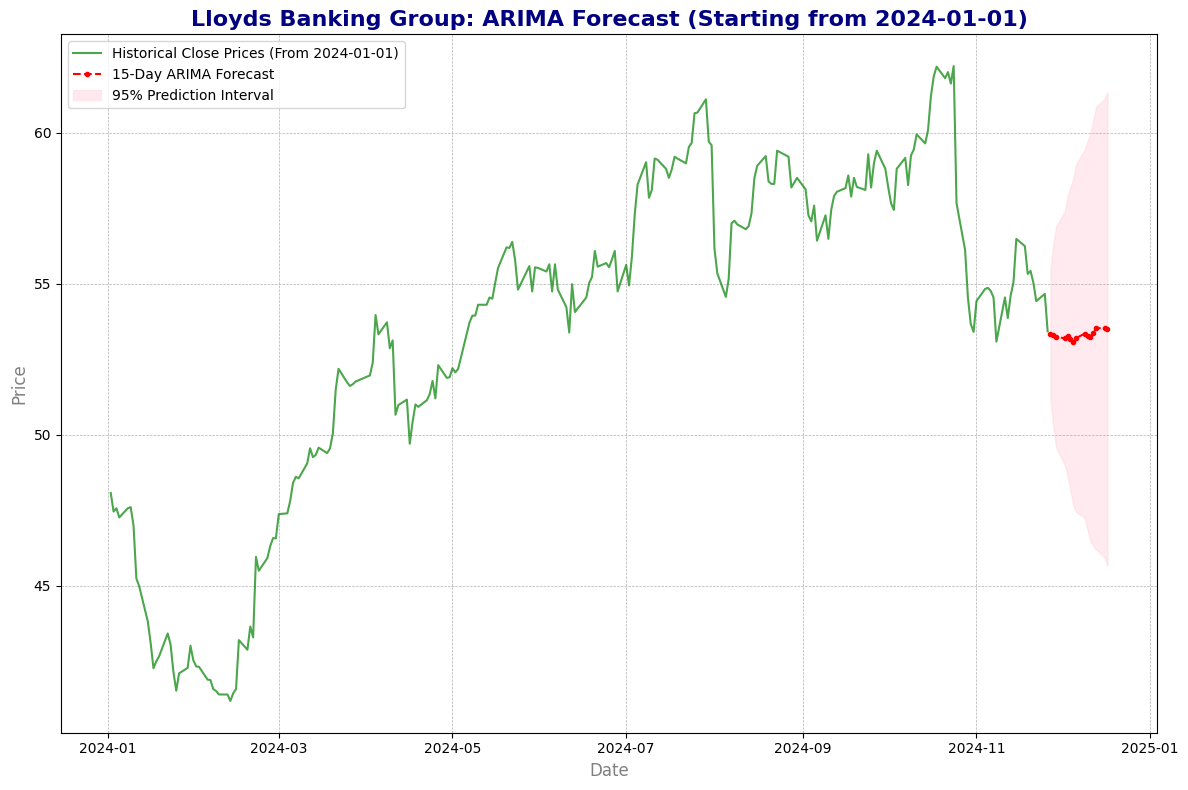

Forecasted Close Prices for the Next 15 Days of 2024:
           Date  Forecasted Close  Lower Bound  Upper Bound
3763 2024-11-27         53.322386    51.152471    55.492301
3764 2024-11-28         53.290326    50.238241    56.342411
3765 2024-11-29         53.236210    49.576951    56.895469
3766 2024-12-02         53.187562    49.001019    57.374104
3767 2024-12-03         53.272506    48.640597    57.904414
3768 2024-12-04         53.172969    48.149446    58.196493
3769 2024-12-05         53.077445    47.683178    58.471712
3770 2024-12-06         53.195037    47.441123    58.948951
3771 2024-12-09         53.344742    47.251226    59.438257
3772 2024-12-10         53.278804    46.851072    59.706535
3773 2024-12-11         53.235150    46.488176    59.982124
3774 2024-12-12         53.358106    46.310009    60.406202
3775 2024-12-13         53.523687    46.197727    60.849646
3776 2024-12-16         53.522634    45.932029    61.113238
3777 2024-12-17         53.495470    45.654133

In [ ]:
# Filter historical data from 2024-01-01 onward
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')  # Ensure the index is datetime
filtered_data = data[data.index >= '2024-01-01']

# Plot data from 2024-01-01 with forecast
plt.figure(figsize=(12, 8))
plt.plot(filtered_data.index, filtered_data['Close'], label='Historical Close Prices (From 2024-01-01)', color='green', alpha=0.7)
plt.plot(forecast_df['Date'], forecast_df['Forecasted Close'], label='15-Day ARIMA Forecast', color='red', linestyle='--', marker='.')
plt.fill_between(forecast_df['Date'], forecast_df['Lower Bound'], forecast_df['Upper Bound'], color='pink', alpha=0.3, label='95% Prediction Interval')
plt.title('Lloyds Banking Group: ARIMA Forecast (Starting from 2024-01-01)', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Display the forecasted values
print("Forecasted Close Prices for the Next 15 Days of 2024:")
print(forecast_df)


# Prophet

In [137]:
data.head(10)

,A d j C l o s e L L O Y . L,C l o s e L L O Y . L,H i g h L L O Y . L,L o w L L O Y . L,O p e n L L O Y . L,V o l u m e L L O Y . L
Date,,,,,,
2010-01-04,36.779499,52.259998,52.259998,51.099998,51.400002,167623403
2010-01-05,38.025188,54.029999,54.759998,52.200001,52.500000,233026957
2010-01-06,38.419312,54.590000,55.230000,53.169998,55.000000,142079248
2010-01-07,40.066143,56.930000,57.070000,54.000000,54.860001,216171360
2010-01-08,40.045036,56.900002,57.520000,56.160000,56.990002,178033888
2010-01-11,39.503124,56.130001,57.950001,55.630001,57.799999,169834032
2010-01-12,39.390518,55.970001,56.290001,55.080002,55.590000,189050155
2010-01-13,39.411633,56.000000,56.200001,55.160000,55.639999,117598072
2010-01-14,40.467300,57.500000,58.000000,56.580002,57.000000,225878876


In [138]:
# Prepare the data for Prophet
# Prophet requires the columns to be named 'ds' (date) and 'y' (value to forecast)

data_for_prophet = data.copy()
data_for_prophet = data_for_prophet
data_for_prophet = data_for_prophet.reset_index()[['Date', 'CloseLLOY.L']].rename(columns={'Date': 'ds', 'CloseLLOY.L': 'y'})

data_for_prophet['ds'] = pd.to_datetime(data_for_prophet['ds'])
data_for_prophet.set_index('ds', inplace=True)

data_for_prophet.tail(10)

KeyError: "['CloseLLOY.L'] not in index"

In [122]:
forecast_data = data_for_prophet[['y']].copy()  # Only copy the 'y' column
forecast_data.reset_index(inplace=True)  # Now reset the index, adding 'ds' as a column
forecast_data.head()

Price,ds,y
Ticker,,LLOY.L
0,2010-01-04,52.259998
1,2010-01-05,54.029999
2,2010-01-06,54.590000
3,2010-01-07,56.930000
4,2010-01-08,56.900002


In [123]:
# Create the Prophet model and fit the data

m = Prophet()
m.fit(forecast_data);

future = m.make_future_dataframe(periods=96, freq='H')
future.tail()

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

TypeError: arg must be a list, tuple, 1-d array, or Series

TypeError: 'NoneType' object is not subscriptable

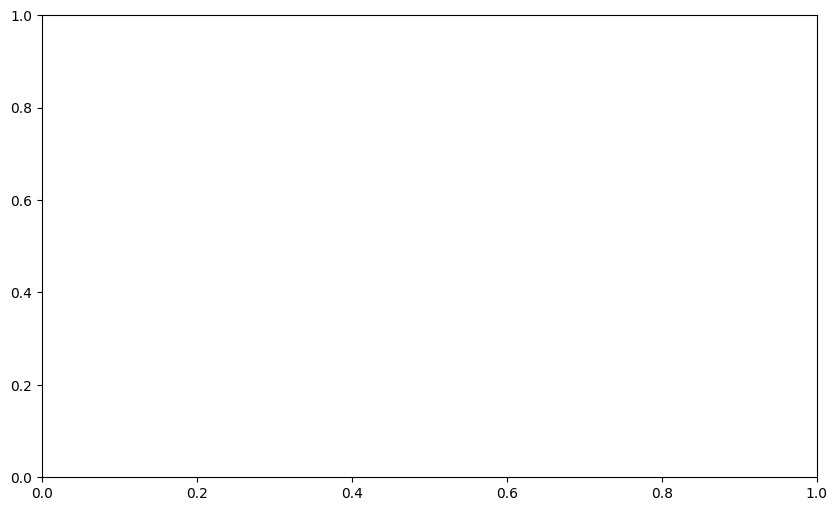

In [124]:
# Plot the forecast
fig = m.plot(forecast, xlabel='Date', ylabel='Price (GBP)');
plt.title('Bitcoin price forecast (USD)')
fig.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))

In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data for Prophet
# Prophet requires the columns to be named 'ds' (date) and 'y' (value to forecast)
data_for_prophet = data_for _prophet.reset_index()[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Initialize and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(data_for_prophet)

# Forecast for the next 15 business days
future = prophet_model.make_future_dataframe(periods=15, freq='B')  # Business days
forecast = prophet_model.predict(future)

# Extract the forecasted values
forecasted_values = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Filter future predictions (next 15 days)
future_predictions = forecasted_values[forecasted_values['ds'] > data_for_prophet['ds'].max()]

# Plot historical data and forecast
prophet_model.plot(forecast)
plt.title('Prophet Forecast: Lloyds Banking Group Close Prices', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Close Price', fontsize=12, color='gray')
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Component plots
prophet_model.plot_components(forecast)
plt.tight_layout()
plt.show()

# Filter historical predictions for RMSE/MSE calculation
historical_forecast = forecast[forecast['ds'] <= data_for_prophet['ds'].max()]

# Calculate RMSE and MSE
rmse = np.sqrt(mean_squared_error(data_for_prophet['y'], historical_forecast['yhat']))
mse = mean_squared_error(data_for_prophet['y'], historical_forecast['yhat'])
mae = mean_absolute_error(data_for_prophet['y'], historical_forecast['yhat'])

print(f"RMSE: {rmse:.2f}")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")

# Plot future predictions only
plt.figure(figsize=(12, 8))
plt.plot(data['Close'], label='Historical Close Prices', color='blue', alpha=0.6)
plt.plot(future_predictions['ds'], future_predictions['yhat'], label='15-Day Prophet Forecast', color='red', linestyle='--', marker='o')
plt.fill_between(future_predictions['ds'],
                 future_predictions['yhat_lower'],
                 future_predictions['yhat_upper'],
                 color='pink', alpha=0.3, label='95% Prediction Interval')
plt.title('Prophet Forecast: Next 15 Business Days', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Close Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Display the forecasted values for the next 15 days
print("Forecasted Close Prices for the Next 15 Business Days:")
print(future_predictions)
